# Part 2: 

## Replicating Lazarevic Work on the positive Dataset 

### Dataset used: 2004 to 2007, average of AAA rated bonds, forward curve, daily data

The aim of Part 2 is to replicate the results from Milan Lazarevic from his paper - this is the positive dataset that refers to the positive interest rate environment that was prevalent between 2004 and 2007 in the Eurozone. 

I have sourced the data from the same source of the author Milan Lazarevic from his paper "Principal component analysis in negative interest rate environment" published in 2019 in the Acta Oeconomica Vol 69. 

You can find it here under daily data: https://ec.europa.eu/eurostat/data/database 
The folder to look for is >Data navigation tree> Database by themes > Economy and finance > Interest rates (irt)> Euro yield curves daily data 


### Data set picking and elaboration

I have, as the author, picked the forward curve instead of the spot curve and the average of the AAA rated bonds instead of the average of the entire euro area. 

My decision to pick the AAA average instead of the entire average of the entire eurozone is just to ensure consistency when comparing my result to his paper results in Parts 2 and 3. 

The decision to pick the forward curve instead of the spot curve comes from the critique that Lekkos provided in his paper of 2000. 

As Lazarevic states at page 109 "Data from the forward rate yield curve were used as the basis, instead of those from the zero-coupon rates, in accordance with the conclusions of Lord – Pelsser (2007) based on the criticism of Lekkos (2000). He pointed out the inadequacy of PCA’s approach to the yield curves of previous authors, primarily by Litterman – Scheinkman (1991) and Steeley (1990), in terms of choosing a zero-coupon rate. The rationale of Lekkos is that on the basis of these data we get a distorted picture (overestimation). The key argument is that zero yield represents the average of continuously compounded forward rates.

The maturities picked are 1y, 2y, 3y, 4y, 5y, 7y, 10, 15y, 20y and 30y, as the author Milan Lazarevic. 

Before using these in R, I have worked on them one step prior on Excel. Meaning that I downloaded the daily data of the forward curve for the AAA rated bonds in Excel and took the first difference to get stationarity. He does this as well by stating this at page 114 "Therefore, it is recommended by Lardic et al. (2003) that the PCA is to be implemented on interest rate changes, since the use of the first differences provides evidence for stationarity of the time series com- prising the yield curve."


## Code

In [4]:
#Loading the dataset

library("readxl")
library("dplyr")

data <- read_excel("fw_2004to2007_diff.xlsx")
head(data)


Date,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004M09D07,0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
2004M09D08,0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
2004M09D09,-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
2004M09D10,-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
2004M09D13,0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
2004M09D14,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01


In [5]:
# Selecting all columns apart from "Date"

data <- select(data, -c("Date"))
head(data)
summary(data)


oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01


      oney                twoy                threey          
 Min.   :-0.170000   Min.   :-0.1700000   Min.   :-0.1500000  
 1st Qu.:-0.020000   1st Qu.:-0.0200000   1st Qu.:-0.0300000  
 Median : 0.000000   Median : 0.0000000   Median : 0.0000000  
 Mean   : 0.001655   Mean   : 0.0008451   Mean   : 0.0003169  
 3rd Qu.: 0.020000   3rd Qu.: 0.0300000   3rd Qu.: 0.0300000  
 Max.   : 0.220000   Max.   : 0.2200000   Max.   : 0.1500000  
     foury                fivey                seveny          
 Min.   :-1.700e-01   Min.   :-0.1900000   Min.   :-0.1400000  
 1st Qu.:-3.000e-02   1st Qu.:-0.0200000   1st Qu.:-0.0200000  
 Median : 0.000e+00   Median : 0.0000000   Median : 0.0000000  
 Mean   : 2.347e-05   Mean   :-0.0001643   Mean   :-0.0003638  
 3rd Qu.: 2.000e-02   3rd Qu.: 0.0200000   3rd Qu.: 0.0200000  
 Max.   : 2.100e-01   Max.   : 0.2500000   Max.   : 0.2600000  
      teny               fifteeny             twentyy          
 Min.   :-0.1300000   Min.   :-0.1600000   Min.

In [6]:
# Transforming my data frame to Matrix 

X <- as.matrix(data)
X
summary(X)

oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01
0.01,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.01,-0.01
0.01,0.02,0.01,0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.02
-0.05,-0.07,-0.05,-0.04,-0.03,-0.02,-0.01,-0.01,-0.01,-0.01
0.00,0.00,-0.02,-0.02,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02


      oney                twoy                threey          
 Min.   :-0.170000   Min.   :-0.1700000   Min.   :-0.1500000  
 1st Qu.:-0.020000   1st Qu.:-0.0200000   1st Qu.:-0.0300000  
 Median : 0.000000   Median : 0.0000000   Median : 0.0000000  
 Mean   : 0.001655   Mean   : 0.0008451   Mean   : 0.0003169  
 3rd Qu.: 0.020000   3rd Qu.: 0.0300000   3rd Qu.: 0.0300000  
 Max.   : 0.220000   Max.   : 0.2200000   Max.   : 0.1500000  
     foury                fivey                seveny          
 Min.   :-1.700e-01   Min.   :-0.1900000   Min.   :-0.1400000  
 1st Qu.:-3.000e-02   1st Qu.:-0.0200000   1st Qu.:-0.0200000  
 Median : 0.000e+00   Median : 0.0000000   Median : 0.0000000  
 Mean   : 2.347e-05   Mean   :-0.0001643   Mean   :-0.0003638  
 3rd Qu.: 2.000e-02   3rd Qu.: 0.0200000   3rd Qu.: 0.0200000  
 Max.   : 2.100e-01   Max.   : 0.2500000   Max.   : 0.2600000  
      teny               fifteeny             twentyy          
 Min.   :-0.1300000   Min.   :-0.1600000   Min.

### For reference, compare this Correlation Matrix to Lazarevic's at page 119. Outcome: same results

In [7]:
# Using the Correlation Matrix
R <- cor(X)
R

,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
oney,1.0000000,0.9367176,0.8429880,0.7317580,0.6241783,0.4916326,0.4432297,0.4151656,0.3997074,0.3854657
twoy,0.9367176,1.0000000,0.9503044,0.8540818,0.7427311,0.5922157,0.5317987,0.5009702,0.4855831,0.4740138
threey,0.8429880,0.9503044,1.0000000,0.9562913,0.8844120,0.7458737,0.6402225,0.5468252,0.5095540,0.4943103
foury,0.7317580,0.8540818,0.9562913,1.0000000,0.9668195,0.8678876,0.7337163,0.5720302,0.5065002,0.4829740
fivey,0.6241783,0.7427311,0.8844120,0.9668195,1.0000000,0.9405138,0.8072030,0.6041727,0.5152359,0.4831126
seveny,0.4916326,0.5922157,0.7458737,0.8678876,0.9405138,1.0000000,0.9192545,0.7139286,0.6021257,0.5520158
teny,0.4432297,0.5317987,0.6402225,0.7337163,0.8072030,0.9192545,1.0000000,0.8924462,0.7999755,0.7475159
fifteeny,0.4151656,0.5009702,0.5468252,0.5720302,0.6041727,0.7139286,0.8924462,1.0000000,0.9662231,0.9395292
twentyy,0.3997074,0.4855831,0.5095540,0.5065002,0.5152359,0.6021257,0.7999755,0.9662231,1.0000000,0.9799224
thirtyy,0.3854657,0.4740138,0.4943103,0.4829740,0.4831126,0.5520158,0.7475159,0.9395292,0.9799224,1.0000000


### For reference, compare these Eigenvalues  to Lazarevic's at page 120. Outcome: same results

In [8]:
# Spectral Decomposition of the correlation Matrix

pcaR <- eigen(R)
pcaR

eigen() decomposition
$values
 [1] 7.187536237 1.724608924 0.814374657 0.165657029 0.043819118 0.015833069
 [7] 0.014090088 0.013266369 0.011020204 0.009794304

$vectors
            [,1]         [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] -0.2749048 -0.356338315  0.46031761  0.58207828 -0.44054007 -0.08120174
 [2,] -0.3110734 -0.329582200  0.35593544 -0.03790152  0.43953959  0.18632205
 [3,] -0.3350118 -0.303109649  0.08614257 -0.33969673  0.29036195 -0.03550438
 [4,] -0.3409526 -0.254329957 -0.18090912 -0.33516987 -0.05525886 -0.05959881
 [5,] -0.3371520 -0.177371362 -0.37048039 -0.19001747 -0.31477585 -0.07343407
 [6,] -0.3306142  0.002600471 -0.49146803  0.22017370 -0.21728927 -0.12739038
 [7,] -0.3322512  0.225563794 -0.29836776  0.45651092  0.35668985  0.54347136
 [8,] -0.3129831  0.397852534  0.08442087  0.15012176  0.30603080 -0.59121246
 [9,] -0.2948045  0.427724293  0.24261353 -0.12679955 -0.06334076 -0.23470878
[10,] -0.2845046  0.429253183  0.29573796 -0.31688

## Correct direction - arbitrary sign choice, so that first PC is positive

In [10]:
pcaData <- prcomp(data, scale = T, center = T)


- pcaData$rotation



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
oney,0.2749048,0.356338315,0.46031761,-0.58207828,0.44054007,-0.08120174,0.09608211,-0.11577662,0.01894052,-0.15191756
twoy,0.3110734,0.329582200,0.35593544,0.03790152,-0.43953959,0.18632205,-0.20250297,0.26852230,0.04866140,0.56841162
threey,0.3350118,0.303109649,0.08614257,0.33969673,-0.29036195,-0.03550438,-0.01062882,0.01924734,-0.44553455,-0.62331543
foury,0.3409526,0.254329957,-0.18090912,0.33516987,0.05525886,-0.05959881,0.08639902,-0.20207831,0.77743951,-0.12117115
fivey,0.3371520,0.177371362,-0.37048039,0.19001747,0.31477585,-0.07343407,0.30929089,-0.26687938,-0.43208675,0.47269940
seveny,0.3306142,-0.002600471,-0.49146803,-0.22017370,0.21728927,-0.12739038,-0.47022903,0.55686228,-0.00386804,-0.07746856
teny,0.3322512,-0.225563794,-0.29836776,-0.45651092,-0.35668985,0.54347136,0.09523337,-0.31301936,0.01383464,-0.10711621
fifteeny,0.3129831,-0.397852534,0.08442087,-0.15012176,-0.30603080,-0.59121246,0.46937737,0.21327101,0.06238581,0.03482622
twentyy,0.2948045,-0.427724293,0.24261353,0.12679955,0.06334076,-0.23470878,-0.59462009,-0.48343744,-0.05815525,0.07372707
thirtyy,0.2845046,-0.429253183,0.29573796,0.31688430,0.39264842,0.48194959,0.20603218,0.33880356,0.01344477,-0.05528276


### For reference, compare these explained variances to Lazarevic's at page 120. Outcome: same results

Note that the cumulative explained variance of the first three PCs in a positive interest rate environment here is shown to be 97.3%. 

This is in accordance with previous literature. 

In [11]:
# Using the function prcomp() to obtain principal components

pcaData <- prcomp(data, scale = T, center = T)
pcaData
summary(pcaData)

Standard deviations (1, .., p=10):
 [1] 2.68095808 1.31324367 0.90242709 0.40700986 0.20933016 0.12582952
 [7] 0.11870168 0.11517973 0.10497716 0.09896618

Rotation (n x k) = (10 x 10):
                PC1          PC2         PC3         PC4         PC5
oney     -0.2749048 -0.356338315 -0.46031761  0.58207828 -0.44054007
twoy     -0.3110734 -0.329582200 -0.35593544 -0.03790152  0.43953959
threey   -0.3350118 -0.303109649 -0.08614257 -0.33969673  0.29036195
foury    -0.3409526 -0.254329957  0.18090912 -0.33516987 -0.05525886
fivey    -0.3371520 -0.177371362  0.37048039 -0.19001747 -0.31477585
seveny   -0.3306142  0.002600471  0.49146803  0.22017370 -0.21728927
teny     -0.3322512  0.225563794  0.29836776  0.45651092  0.35668985
fifteeny -0.3129831  0.397852534 -0.08442087  0.15012176  0.30603080
twentyy  -0.2948045  0.427724293 -0.24261353 -0.12679955 -0.06334076
thirtyy  -0.2845046  0.429253183 -0.29573796 -0.31688430 -0.39264842
                 PC6         PC7         PC8         PC

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6810 1.3132 0.90243 0.40701 0.20933 0.12583 0.11870
Proportion of Variance 0.7188 0.1725 0.08144 0.01657 0.00438 0.00158 0.00141
Cumulative Proportion  0.7188 0.8912 0.97265 0.98922 0.99360 0.99518 0.99659
                           PC8    PC9    PC10
Standard deviation     0.11518 0.1050 0.09897
Proportion of Variance 0.00133 0.0011 0.00098
Cumulative Proportion  0.99792 0.9990 1.00000

## Here doubt: question to professor Elias


**Question to the professor Elias:**

Here above I get however in the first PC negative values - whereas Lazarevic gets exactly the opposite sign for all my values in the rotation operation. 
What do you think I did wrong?

In [12]:
#Eigenvalues
pcaR$values


[1] 7.187536237 1.724608924 0.814374657 0.165657029 0.043819118 0.015833069
 [7] 0.014090088 0.013266369 0.011020204 0.009794304

In [13]:
# Calculate the Principal Components
factors <- X %*% pcaR$vectors
factors

# Principal Components from 1 to 5
pc1 <- factors[ ,1] 
pc2 <- factors[ ,2] 
pc3 <- factors[ ,3] 
pc4 <- factors[ ,4] 
pc5 <- factors[ ,5] 

0.0082588908,-0.064173110,0.0481444735,0.0138635003,-0.0017497843,-0.0031048080,-0.0015634201,-4.693921e-03,0.0020678189,7.877885e-03
-0.0545609954,-0.048872032,0.0099132002,-0.0062313987,0.0063602745,0.0104129436,-0.0053087501,3.056731e-03,-0.0011494522,-3.128936e-03
0.1896374553,0.095309624,0.0014149440,0.0136125717,-0.0141545380,-0.0005555299,0.0069171876,1.087117e-05,0.0024185006,-3.471415e-03
0.1193465209,0.053809182,-0.0369094179,-0.0043655260,-0.0023391390,-0.0013490306,-0.0018562832,-6.616690e-04,0.0076329897,-3.190504e-03
-0.0583073526,-0.046045040,0.0466179798,0.0144230999,0.0058856066,-0.0065657181,-0.0020809027,1.418300e-04,-0.0107560476,-1.026275e-03
0.0256619428,0.028364144,-0.0046619572,-0.0042083070,-0.0038404738,0.0060314098,0.0051467066,9.308706e-04,0.0042782531,8.430030e-04
0.0094963864,-0.018367321,0.0013591300,0.0041912944,-0.0064727154,-0.0028070144,-0.0007994072,-1.286056e-03,-0.0001256945,-9.807189e-04
-0.0006396807,-0.034825893,0.0045727937,-0.0001465591,0.0085955915,-0.0048511012,-0.0061520864,-1.440157e-03,0.0040321354,3.495475e-03
0.0948813531,0.056681544,-0.0273023980,0.0036083858,-0.0093267647,-0.0020674528,0.0048122081,6.574006e-03,-0.0004493133,-8.273472e-03
0.0546716233,-0.014989671,0.0175608877,0.0074334937,0.0039775040,0.0032024625,0.0028851924,2.824017e-03,0.0014894776,8.836714e-03
-0.0187112061,-0.008602862,0.0079280811,-0.0023192730,-0.0003021427,0.0038867076,-0.0039187535,-1.086906e-02,-0.0081389045,-9.628881e-03


## Shift, Slope and Curvature

With the term **shift** it is here meant the shift of the entire yield curve. If the front end (the front end part of the curve means the short term maturities) shifts lower and lower, the 10y maturity and the rest of the curve will shift accordingly. Being the 10year maturity here in the ‘middle’ of the curve, this will be the maturity chosen to represent the shift of the yield curve. 

With the term **slope** it is here meant a spread. A spread is the difference between two financial assets, here bonds and their yields. The spread considered for the slope is the common 2s10s spread. This is calculated by the 10year yield minus the 2 year yield. 

With the term **curvature** it will here be meant the ‘butterfly’ spread. A butterfly spread in financial terms is the spread within a butterfly trade. A butterfly trade consists picking two points on the curve and selling (buying) them while simultaneously picking a point between these two and buying (selling) it. The former trade is performed if one is betting that the curve in the chosen part of the curve is going to flatten and/or its curvature is going to look more convex. The latter is performed if one is betting that the chosen part of the curve is going to steepen and/or its curvature is going to look more concave. The butterfly trade can be expressed in any part of the curve – but the butterfly spread chosen here is to express the curvature of the entire curve, hence the picked butterfly spread here is the 7s15s30s spread. This is calculated by multiplying the 15 years yield by two and subtracting the 15 years yield and the 30 years yield. 

Accordingly to previous literature: the first PC should represent the shift, the second PC should represent the slope and the third PC should represent the curvature. 
We can show this here by looking at the absolute value of their respective correlations - if, in absolute values, this is near 1 (and/or above 0.5), we can state that these statement are being illustrated in a satisfactory manner. 


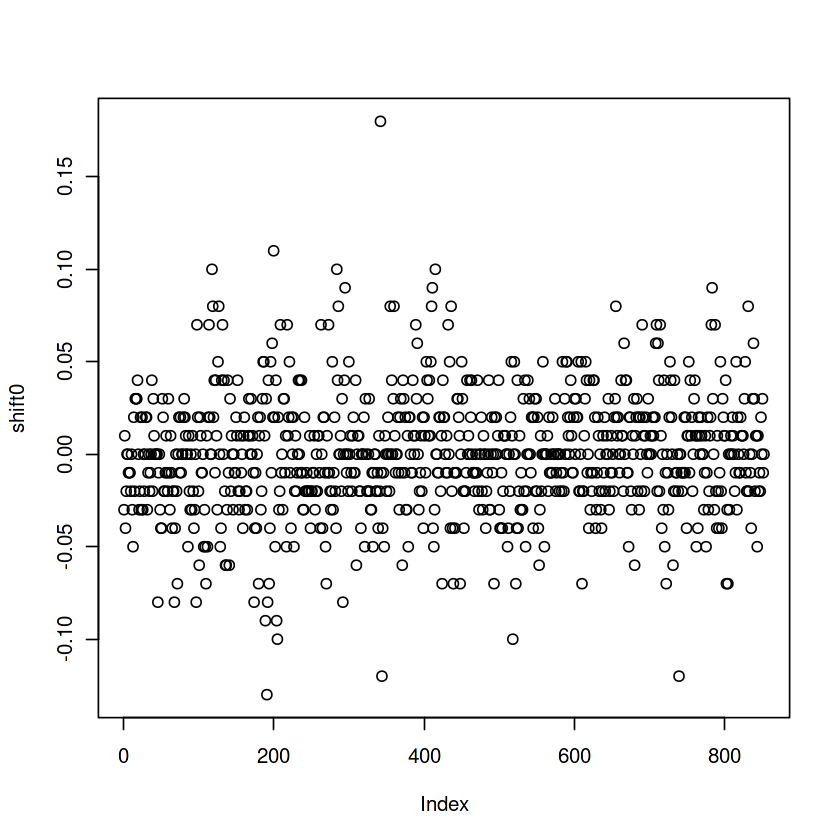

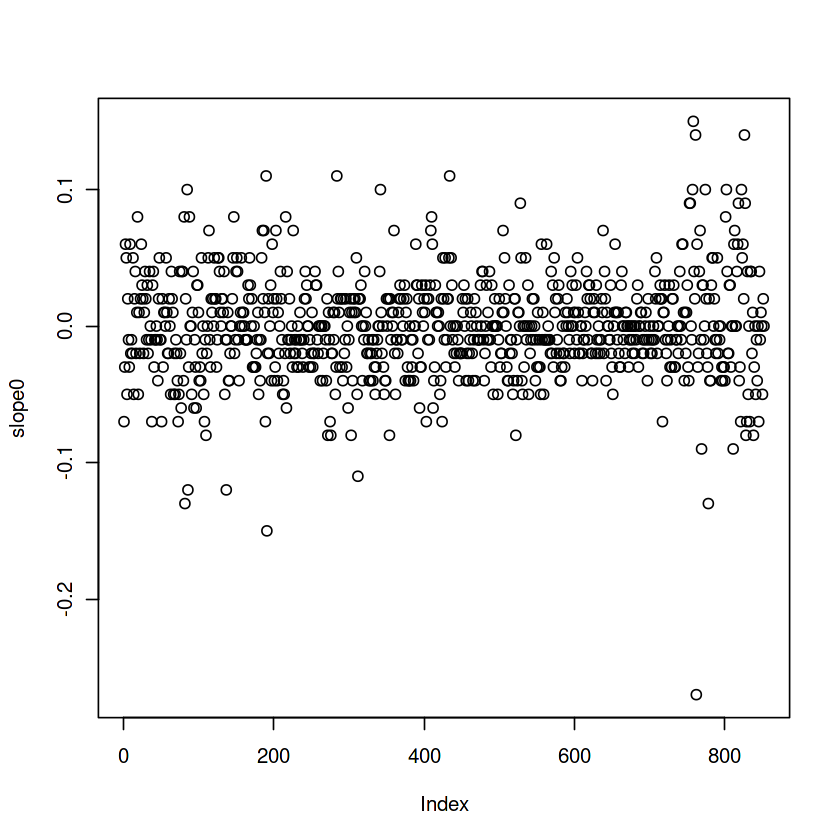

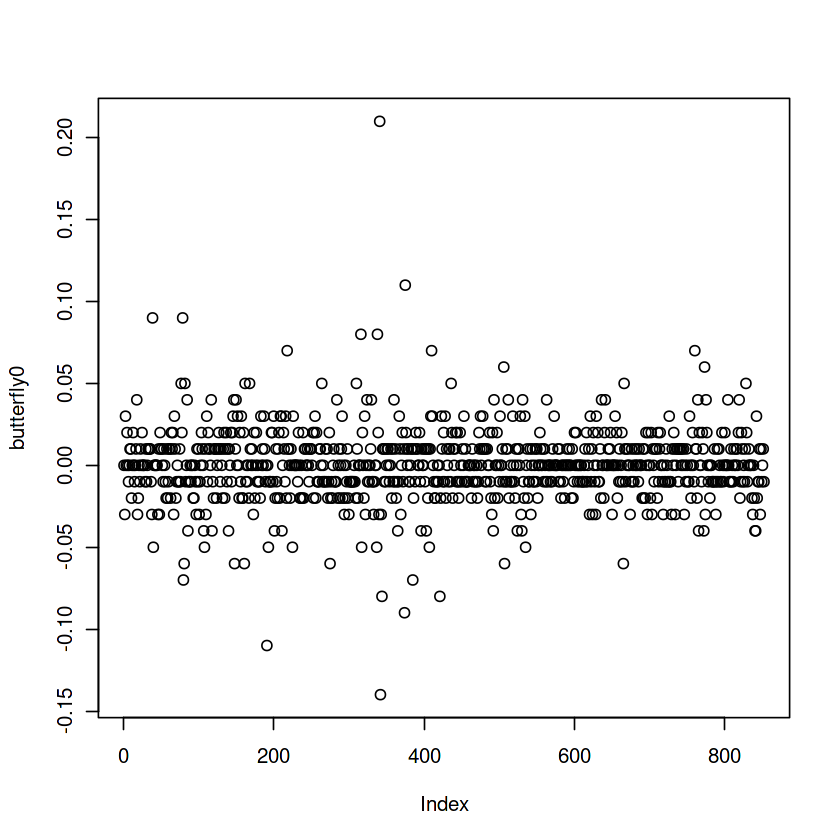

In [14]:
shift0 <- (data$teny)
plot(shift0)

slope0 <- (data$teny - data$twoy)
plot(slope0)

butterfly0 <- (2*data$fifteeny - data$seveny - data$thirtyy)
plot(butterfly0)

## Correlations of PC1 with Shift, PC2 with Slope, PC3 with Curvature

In [15]:
cor(shift0, pc1) 
cor(slope0, pc2)
cor(butterfly0, pc3)


[1] -0.8789742

[1] 0.7734786

[1] 0.4772936

Given how high these correlations are, in absolute terms, this is here shown to be the case. 

The first PC represents the shift, the second the slope and the third the curvature of an yield curve. 

Here the correlation of the third PC with the Curvature is less pronounced than in the Part 1 - but this is not object/purpose of further analysis here.

## Plots

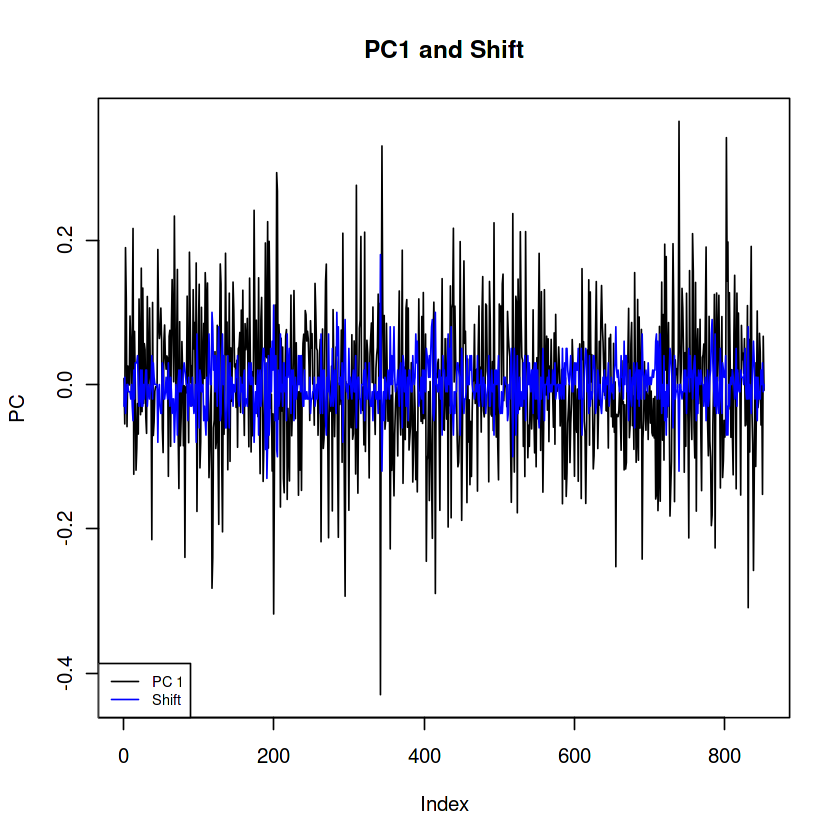

In [12]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "PC1 and Shift",
     xlab = "Index", ylab = "PC")
lines(shift0, col = "blue")
legend("bottomleft", legend = c("PC 1", "Shift"),
       col = c("black", "blue"), lwd = 1, cex = 0.7)

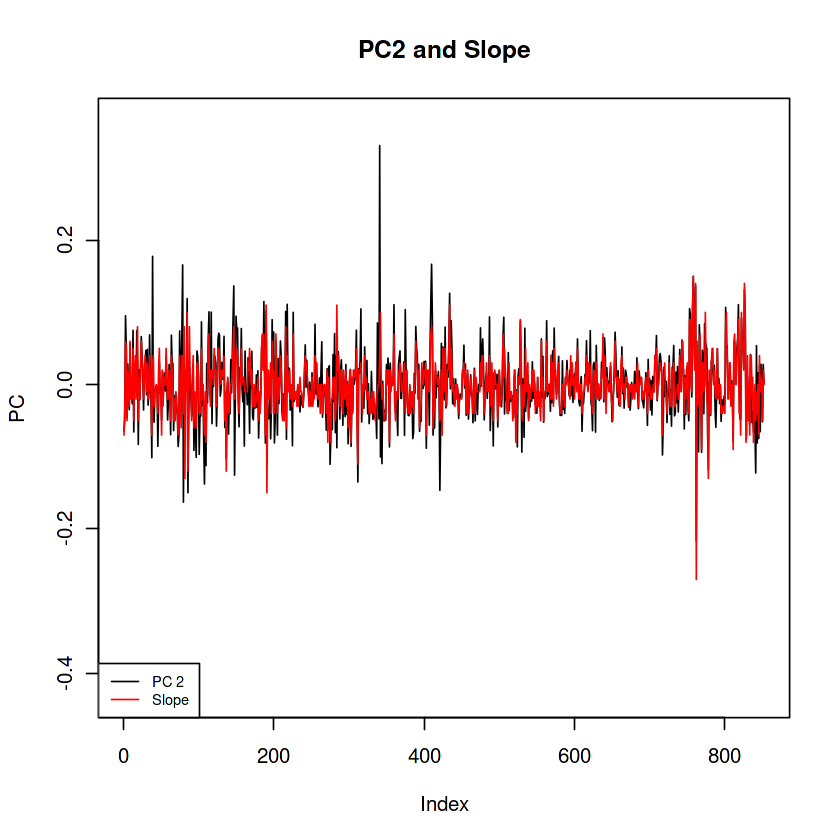

In [13]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc2, type = "l", ylim = yLimits, main = "PC2 and Slope",
     xlab = "Index", ylab = "PC")
lines(slope0, col = "red")
legend("bottomleft", legend = c("PC 2", "Slope"),
       col = c("black", "red"), lwd = 1, cex = 0.7)

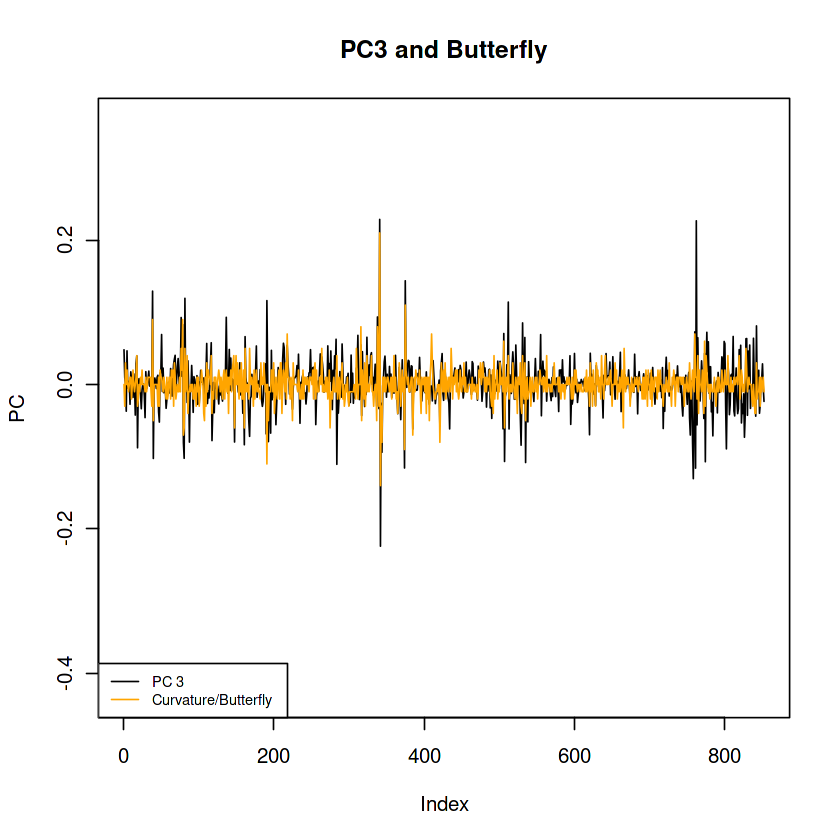

In [14]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc3, type = "l", ylim = yLimits, main = "PC3 and Butterfly",
     xlab = "Index", ylab = "PC")
lines(butterfly0, col = "orange")
legend("bottomleft", legend = c("PC 3", "Curvature/Butterfly"),
       col = c("black", "orange"), lwd = 1, cex = 0.7)

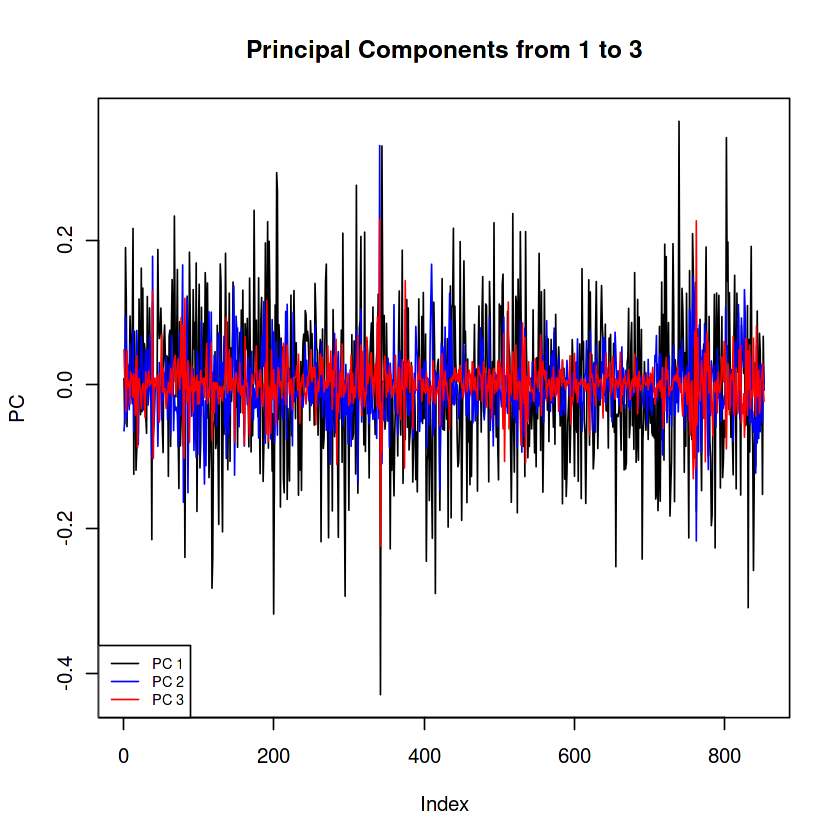

In [15]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "Principal Components from 1 to 3",
     xlab = "Index", ylab = "PC")
lines(pc2, col = "blue")
lines(pc3, col = "red")
legend("bottomleft", legend = c("PC 1", "PC 2", "PC 3"),
       col = c("black", "blue", "red"), lwd = 1, cex = 0.7)

## Loadings of the first three components

The first component has no sign change. The second component has 1 sign change. The third component has 2 sign changes. 

Also this can allude to the properties of shift, slope and curvature. 

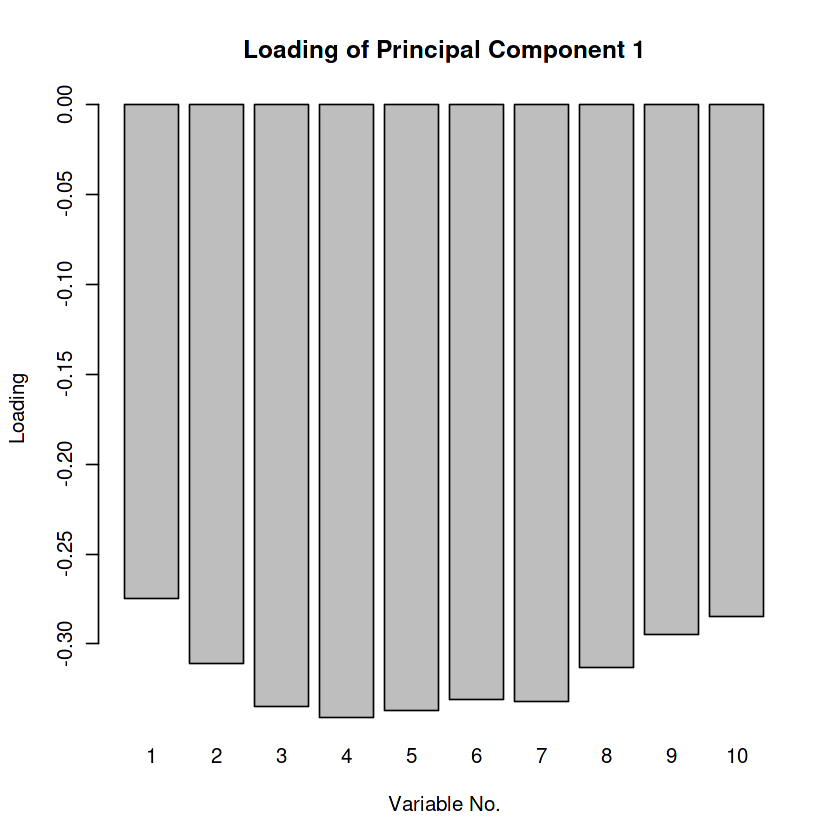

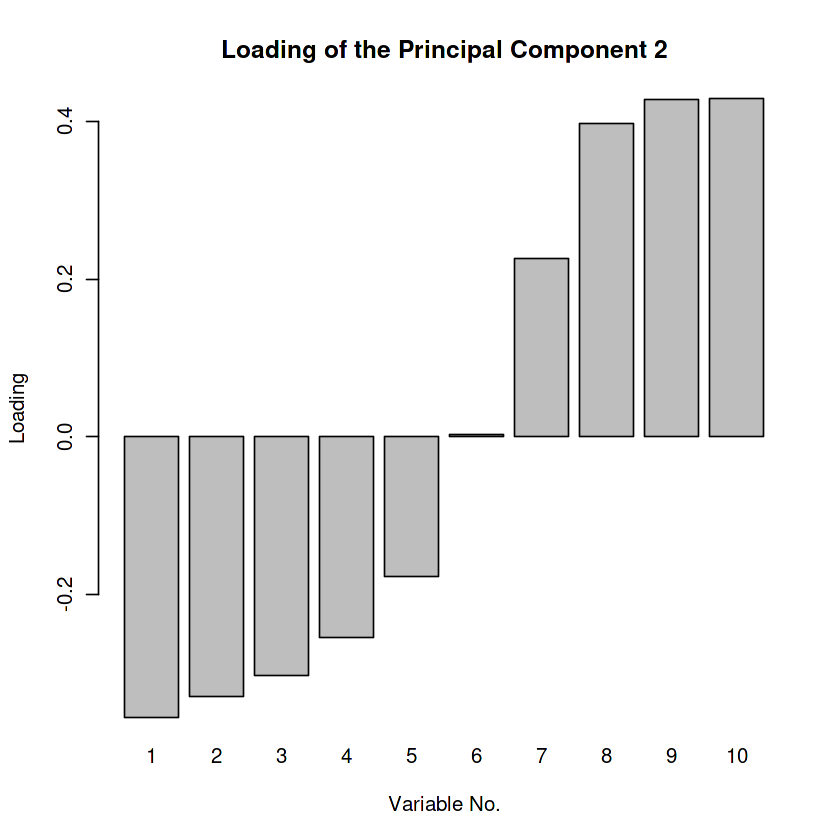

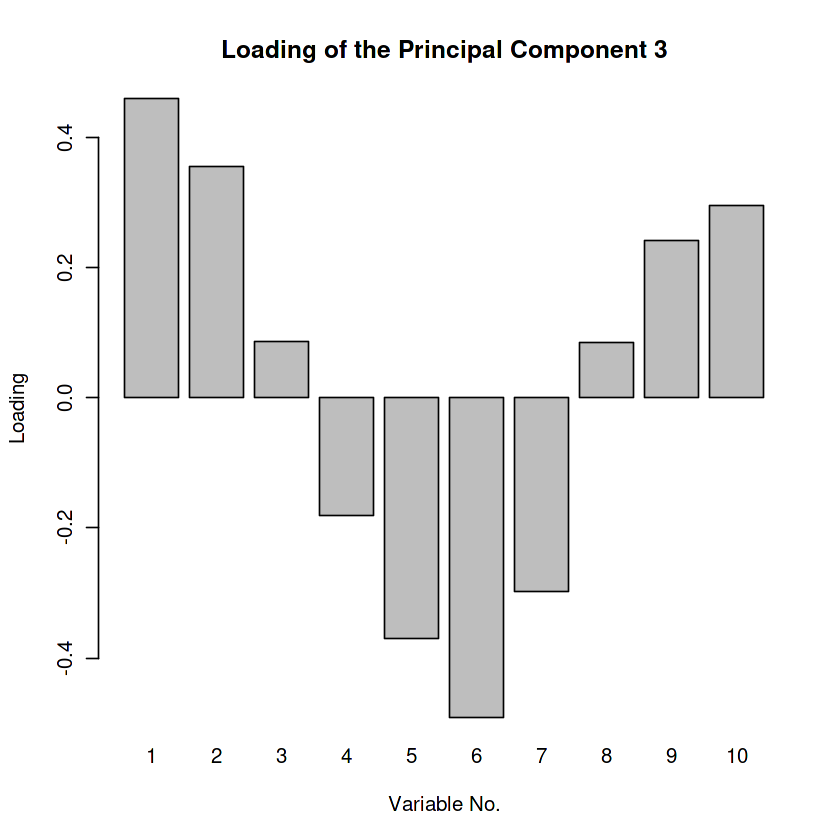

In [16]:
# Plot the loadings of the first three components
barplot(pcaR$vectors[, 1], main = "Loading of Principal Component 1",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(pcaR$vectors[, 2], main = "Loading of the Principal Component 2",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(pcaR$vectors[, 3], main = "Loading of the Principal Component 3",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")

In [17]:
#Relative Variences
vars <- pcaData$sdev^2/sum(pcaData$sdev^2)*100
vars


[1] 71.87536237 17.24608924  8.14374657  1.65657029  0.43819118  0.15833069
 [7]  0.14090088  0.13266369  0.11020204  0.09794304

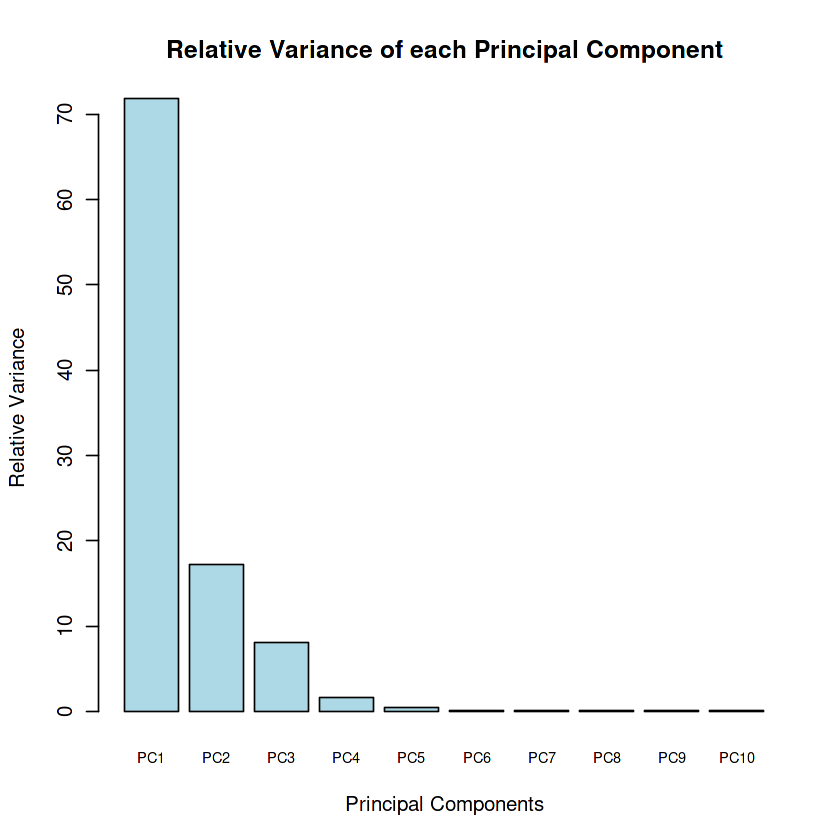

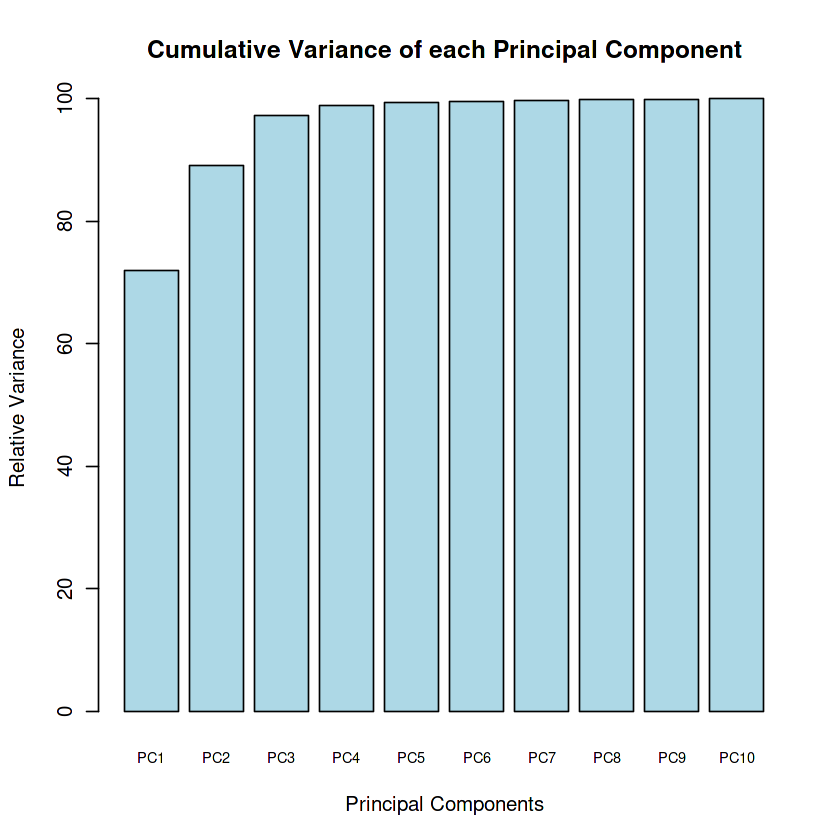

In [18]:
# Barplot of the relative variances
barplot(pcaData$sdev^2/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Relative Variance of each Principal Component")

# Barplot of the cumulative percentage of the variances 
barplot(cumsum(pcaData$sdev^2)/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Cumulative Variance of each Principal Component")
